In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder

# Application Table

In [2]:
df = pd.read_csv('application_train.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df['ORGANIZATION_TYPE'].value_counts()

Business Entity Type 3    67992
XNA                       55374
Self-employed             38412
Other                     16683
Medicine                  11193
Business Entity Type 2    10553
Government                10404
School                     8893
Trade: type 7              7831
Kindergarten               6880
Construction               6721
Business Entity Type 1     5984
Transport: type 4          5398
Trade: type 3              3492
Industry: type 9           3368
Industry: type 3           3278
Security                   3247
Housing                    2958
Industry: type 11          2704
Military                   2634
Bank                       2507
Agriculture                2454
Police                     2341
Transport: type 2          2204
Postal                     2157
Security Ministries        1974
Trade: type 2              1900
Restaurant                 1811
Services                   1575
University                 1327
Industry: type 7           1307
Transpor

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


## Data Cleaning

In [5]:
df.drop(['FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR','FLAG_DOCUMENT_8', 'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10',
       'FLAG_DOCUMENT_11', 'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13',
       'FLAG_DOCUMENT_14', 'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16',
       'FLAG_DOCUMENT_17','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE',
       'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7','EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3','APARTMENTS_MODE',
       'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE',
       'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE',
       'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE',
       'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE',
       'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI',
       'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI',
       'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI',
       'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI',
       'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE',
       'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE','REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY'], axis = 1, inplace = True)

In [6]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE',
       'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE',
       'FLAG_PHONE', 'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'ORGANIZATION_TYPE', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',

### Missing Values Handling

In [7]:
total_miss = df.isnull().sum().sort_values(ascending=False)
percent_miss = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Total', 'Percent'])
missing_data.head(49)

,Total,Percent
COMMONAREA_AVG,214865,69.872297
NONLIVINGAPARTMENTS_AVG,213514,69.432963
LIVINGAPARTMENTS_AVG,210199,68.354953
FLOORSMIN_AVG,208642,67.848630
YEARS_BUILD_AVG,204488,66.497784
OWN_CAR_AGE,202929,65.990810
LANDAREA_AVG,182590,59.376738
BASEMENTAREA_AVG,179943,58.515956
NONLIVINGAREA_AVG,169682,55.179164
ELEVATORS_AVG,163891,53.295980


In [8]:
cols_fillna = ['APARTMENTS_AVG','BASEMENTAREA_AVG','YEARS_BEGINEXPLUATATION_AVG', 
               'YEARS_BUILD_AVG', 'COMMONAREA_AVG','ELEVATORS_AVG', 'ENTRANCES_AVG', 
               'FLOORSMAX_AVG', 'FLOORSMIN_AVG','LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 
               'LIVINGAREA_AVG','NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG','OWN_CAR_AGE',
               'AMT_GOODS_PRICE','AMT_ANNUITY','CNT_FAM_MEMBERS']

for i in cols_fillna:
  df[i].fillna(df[i].median(),inplace=True)

In [9]:
total_miss = df.isnull().sum().sort_values(ascending=False)
percent_miss = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Total', 'Percent'])
missing_data.head(49)

,Total,Percent
OCCUPATION_TYPE,96391,31.345545
NAME_TYPE_SUITE,1292,0.420148
SK_ID_CURR,0,0.000000
YEARS_BEGINEXPLUATATION_AVG,0,0.000000
FLAG_EMAIL,0,0.000000
CNT_FAM_MEMBERS,0,0.000000
REGION_RATING_CLIENT,0,0.000000
REGION_RATING_CLIENT_W_CITY,0,0.000000
WEEKDAY_APPR_PROCESS_START,0,0.000000
HOUR_APPR_PROCESS_START,0,0.000000


In [10]:
# columns 'OCCUPATION_TYPE' and 'NAME_TYPE_SUITE' contain categorical data with nan values
# drop rows with nan values in both columns
df = df.dropna()

In [11]:
total_miss = df.isnull().sum().sort_values(ascending=False)
percent_miss = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Total', 'Percent'])
missing_data.head(49)

,Total,Percent
SK_ID_CURR,0,0.0
FLAG_CONT_MOBILE,0,0.0
FLAG_EMAIL,0,0.0
OCCUPATION_TYPE,0,0.0
CNT_FAM_MEMBERS,0,0.0
REGION_RATING_CLIENT,0,0.0
REGION_RATING_CLIENT_W_CITY,0,0.0
WEEKDAY_APPR_PROCESS_START,0,0.0
HOUR_APPR_PROCESS_START,0,0.0
ORGANIZATION_TYPE,0,0.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210213 entries, 0 to 307510
Data columns (total 49 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   210213 non-null  int64  
 1   TARGET                       210213 non-null  int64  
 2   NAME_CONTRACT_TYPE           210213 non-null  object 
 3   CODE_GENDER                  210213 non-null  object 
 4   FLAG_OWN_CAR                 210213 non-null  object 
 5   FLAG_OWN_REALTY              210213 non-null  object 
 6   CNT_CHILDREN                 210213 non-null  int64  
 7   AMT_INCOME_TOTAL             210213 non-null  float64
 8   AMT_CREDIT                   210213 non-null  float64
 9   AMT_ANNUITY                  210213 non-null  float64
 10  AMT_GOODS_PRICE              210213 non-null  float64
 11  NAME_TYPE_SUITE              210213 non-null  object 
 12  NAME_INCOME_TYPE             210213 non-null  object 
 13 

In [13]:
df.round(3)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.014,0.00,0.069,0.083,0.125,0.037,0.020,0.019,0.000,0.000
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.060,0.08,0.034,0.292,0.333,0.013,0.077,0.055,0.004,0.010
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.021,0.00,0.138,0.167,0.208,0.048,0.076,0.074,0.000,0.004
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.021,0.00,0.138,0.167,0.208,0.048,0.076,0.074,0.000,0.004
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.021,0.00,0.138,0.167,0.208,0.048,0.076,0.074,0.000,0.004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0.021,0.00,0.138,0.167,0.208,0.048,0.076,0.074,0.000,0.004
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.020,0.22,0.103,0.604,0.271,0.059,0.148,0.196,0.075,0.110
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.012,0.00,0.207,0.167,0.208,0.048,0.084,0.928,0.000,0.000
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.021,0.00,0.069,0.042,0.208,0.048,0.076,0.006,0.000,0.004


## Feature Engineering

In [14]:
df['average_building'] = df[['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG']].mean(axis=1)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,average_building
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.144336
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.206343
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0.00,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0000,0.0036,0.188321
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0.00,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0000,0.0036,0.188321
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0.00,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0000,0.0036,0.188321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0.00,0.1379,0.1667,0.2083,0.0481,0.0756,0.0745,0.0000,0.0036,0.188321
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0.22,0.1034,0.6042,0.2708,0.0594,0.1484,0.1965,0.0753,0.1095,0.279721
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0.00,0.2069,0.1667,0.2083,0.0481,0.0841,0.9279,0.0000,0.0000,0.255257
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0.00,0.0690,0.0417,0.2083,0.0481,0.0756,0.0061,0.0000,0.0036,0.163893


In [15]:
# drop building informations
df.drop(['APARTMENTS_AVG', 'BASEMENTAREA_AVG',
       'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG',
       'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG',
       'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG',
       'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG'], axis = 1, inplace = True) 

In [16]:
df.shape

(210213, 36)

# Exploration

In [17]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Jumlah Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Jumlah Categorical features: ", len(categorical_feats))

Jumlah Numerical features:  24
Jumlah Categorical features:  12


In [18]:
# function for display the percentage
def with_per(total, axis):
    for p in axis.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()
        y = p.get_height()
        ax.annotate(percentage, (x, y),ha='center')

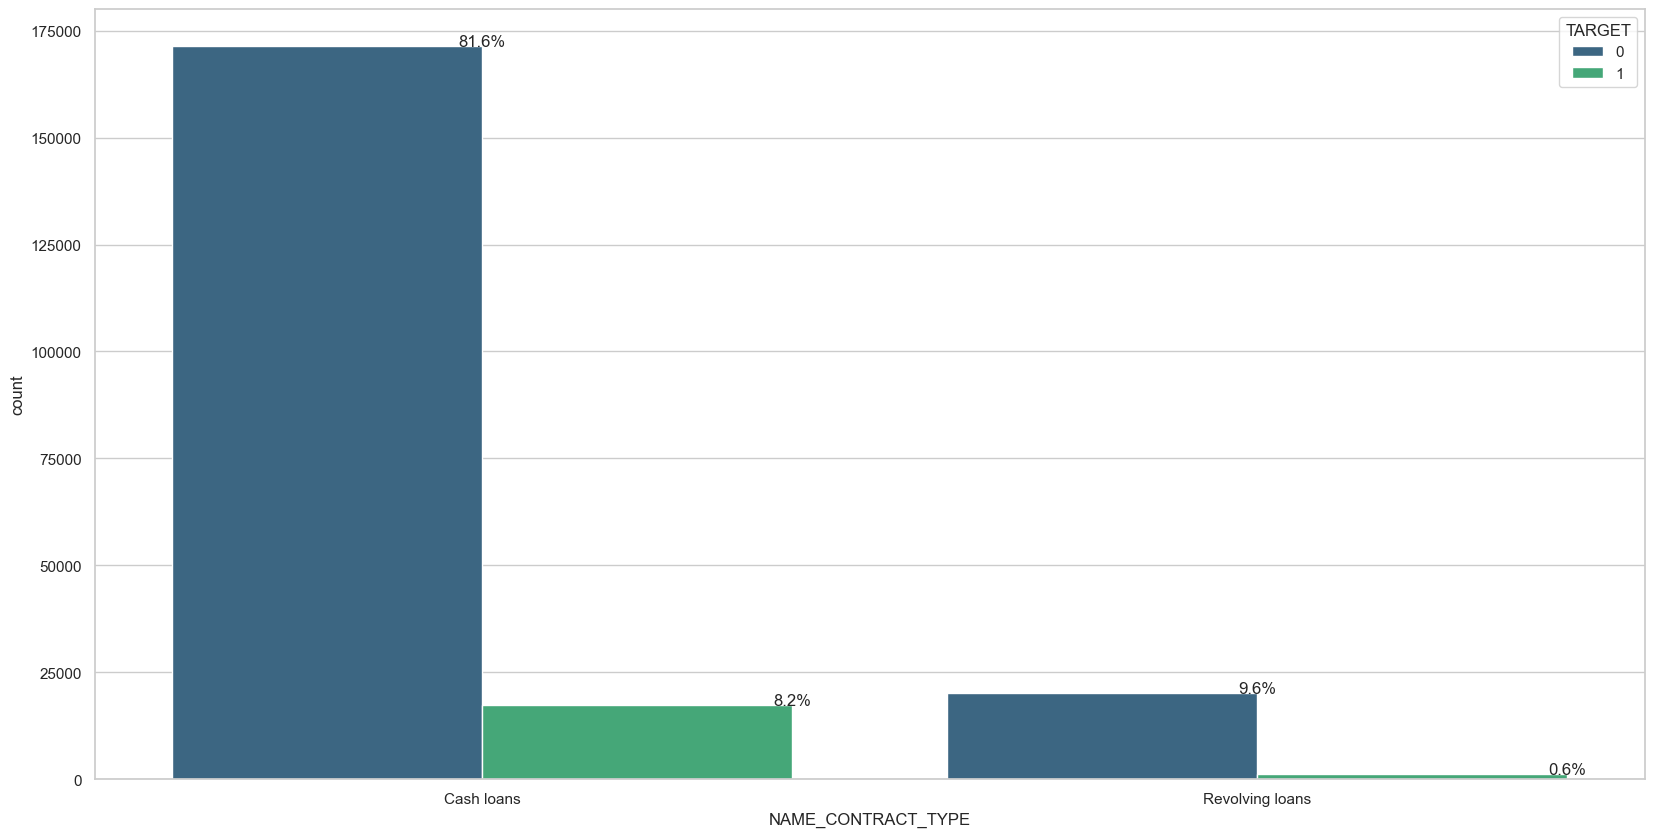

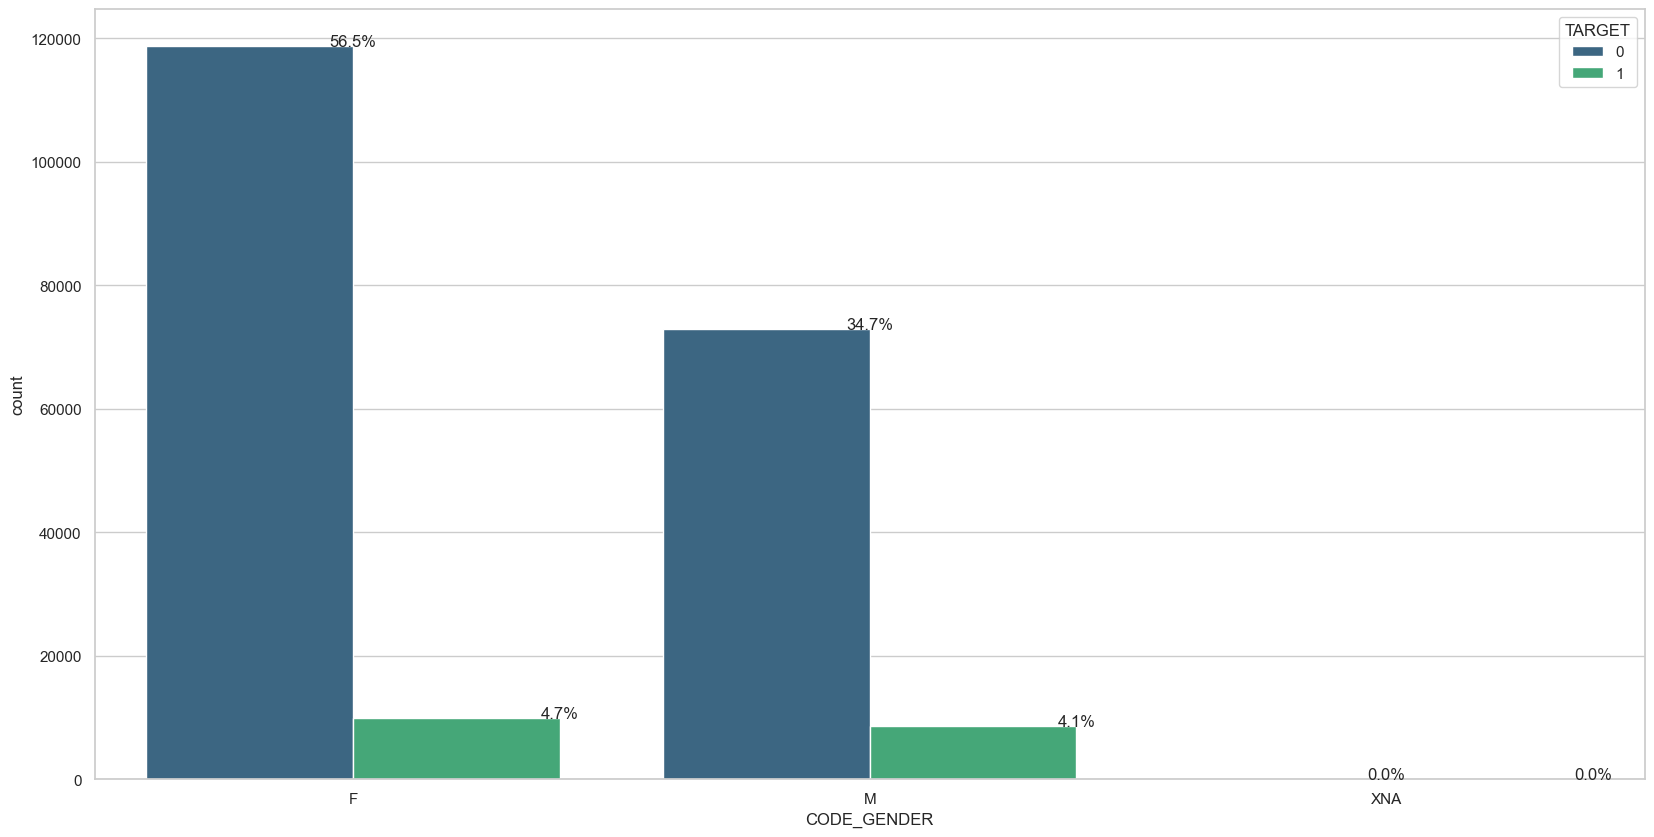

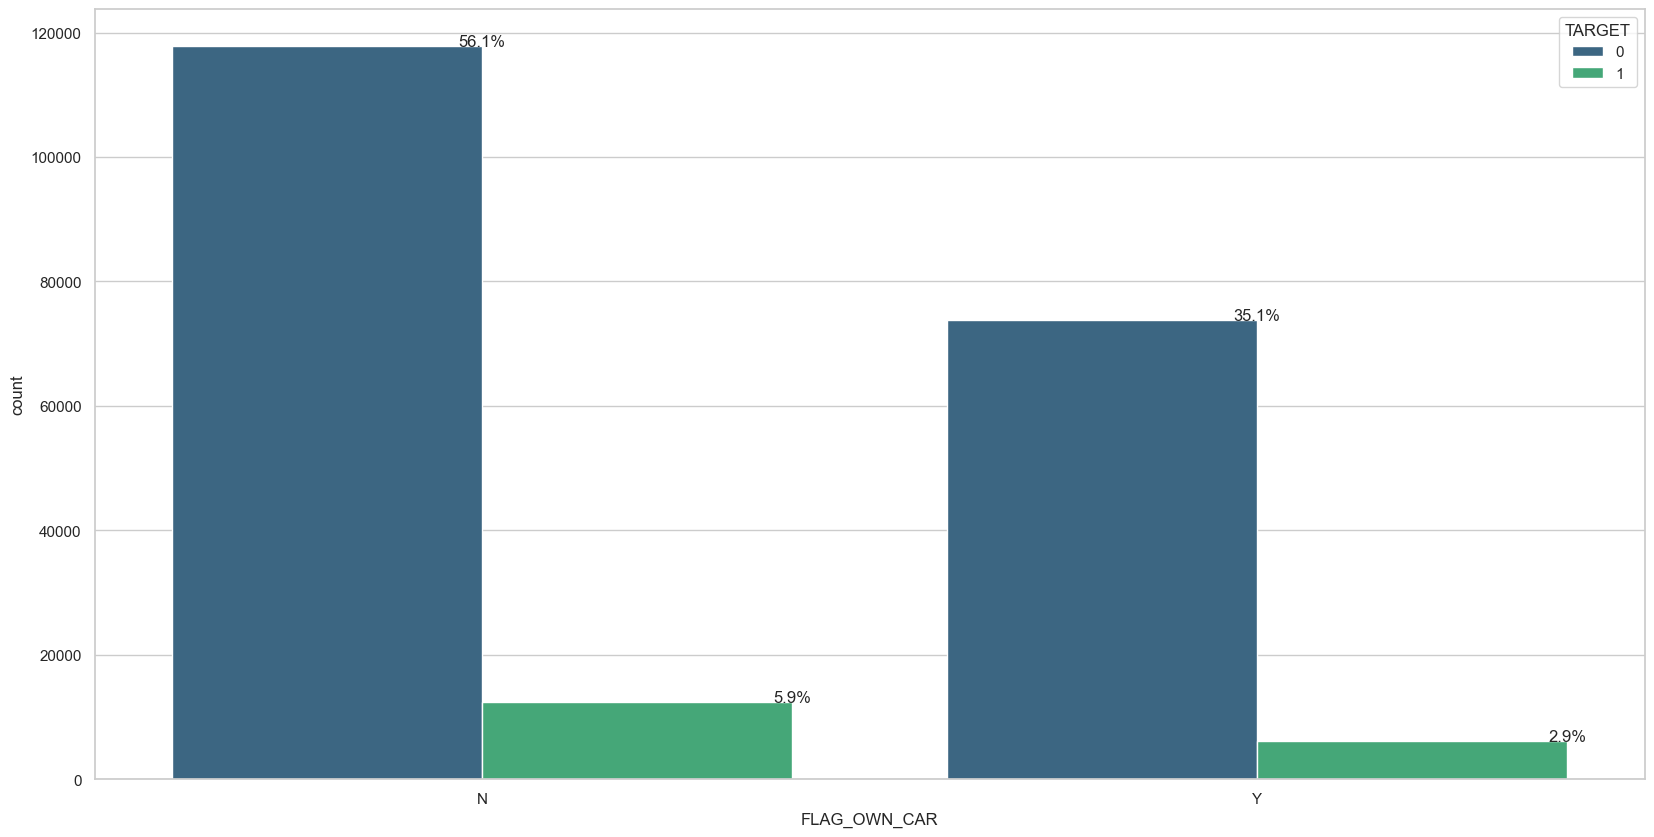

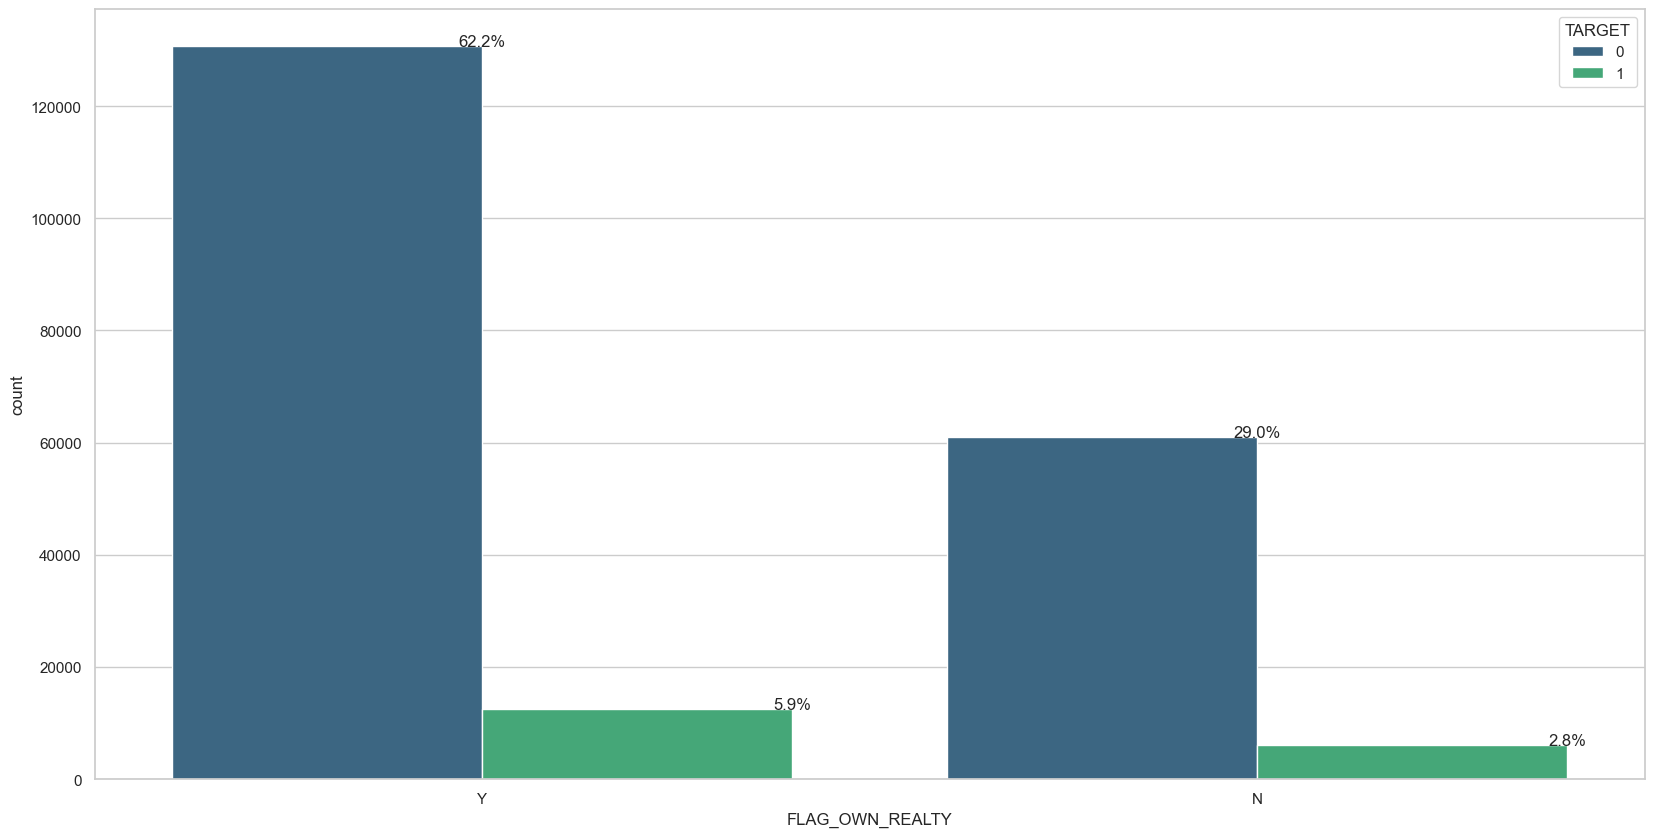

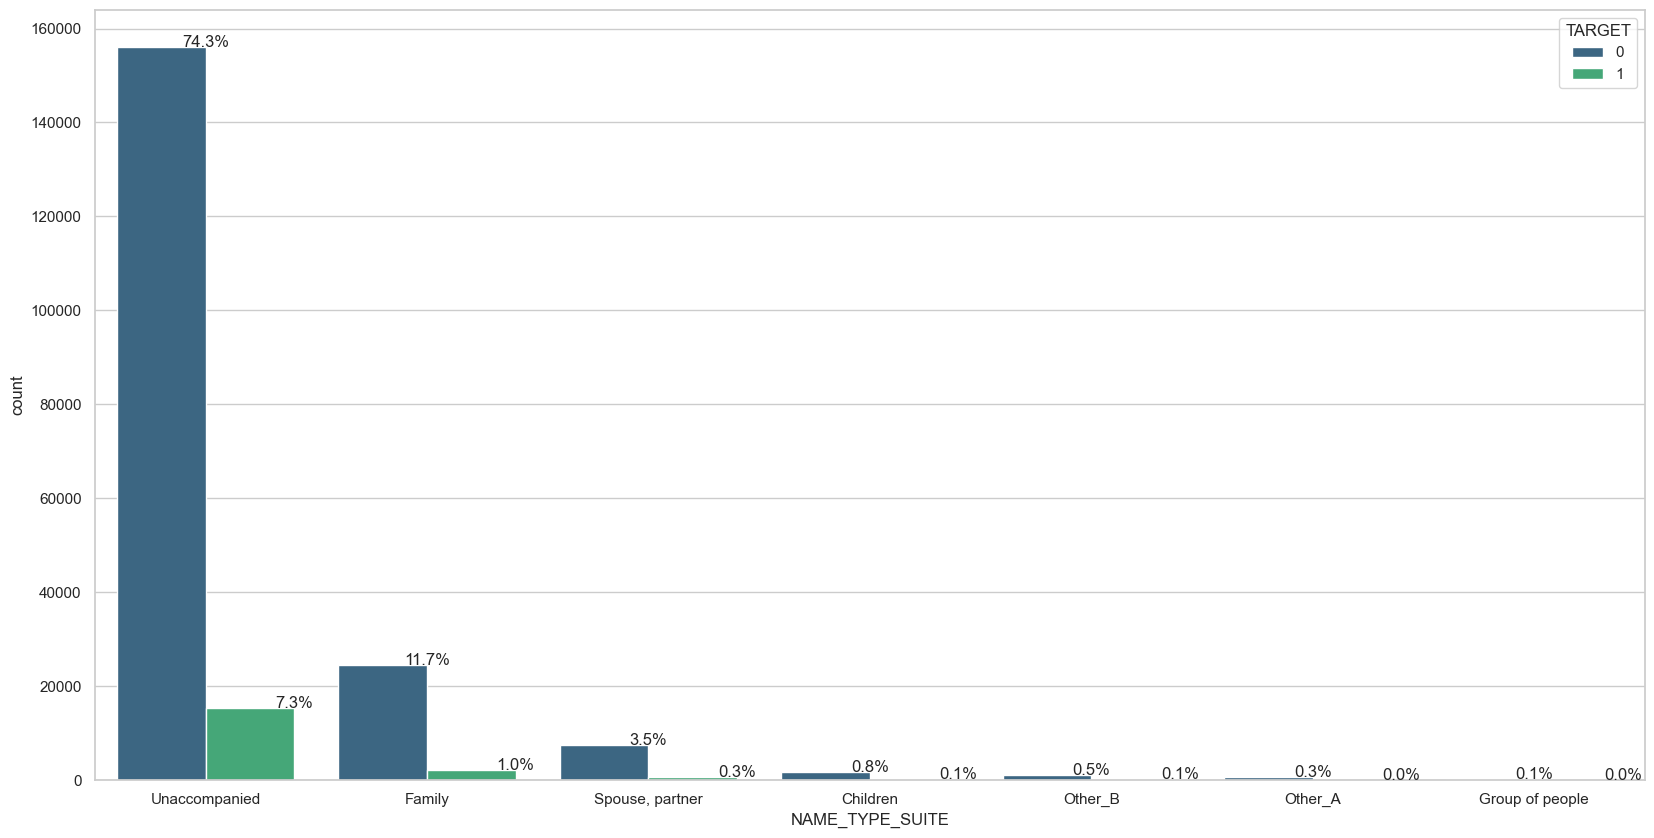

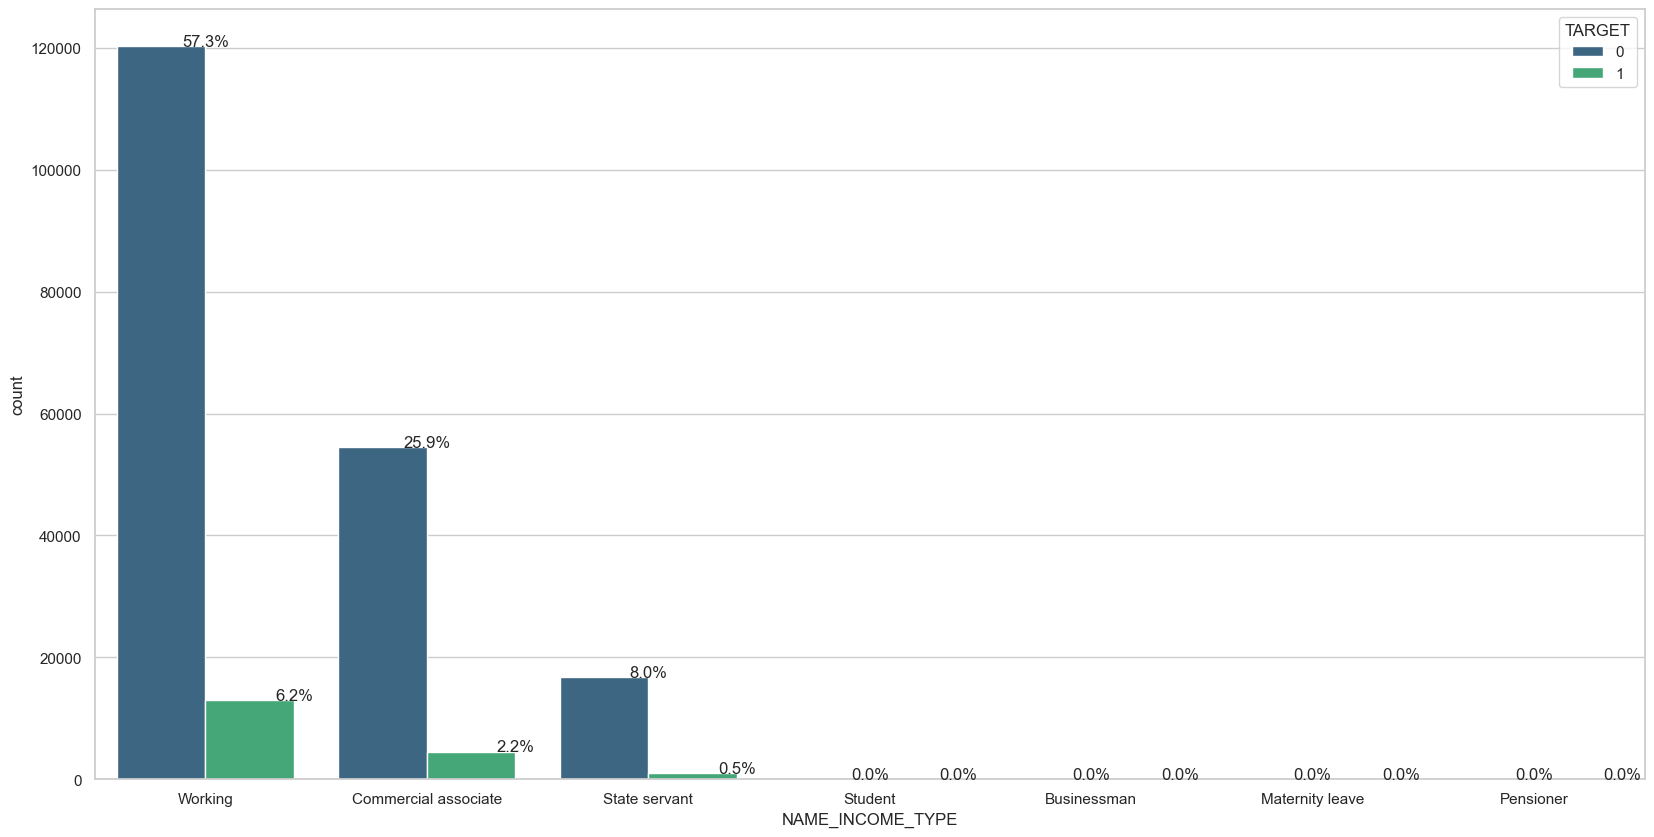

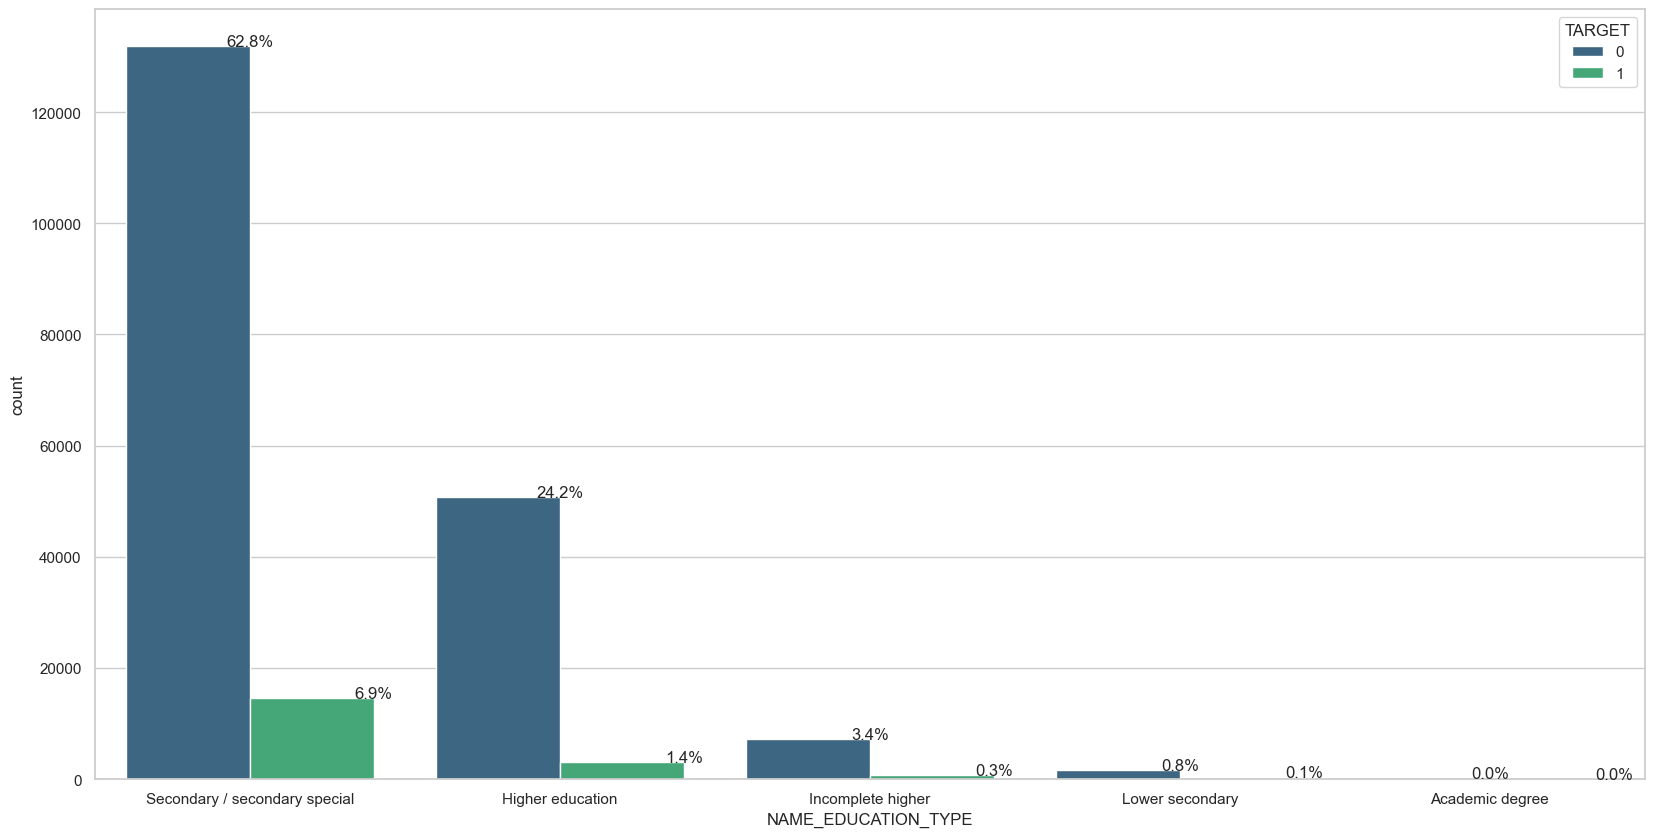

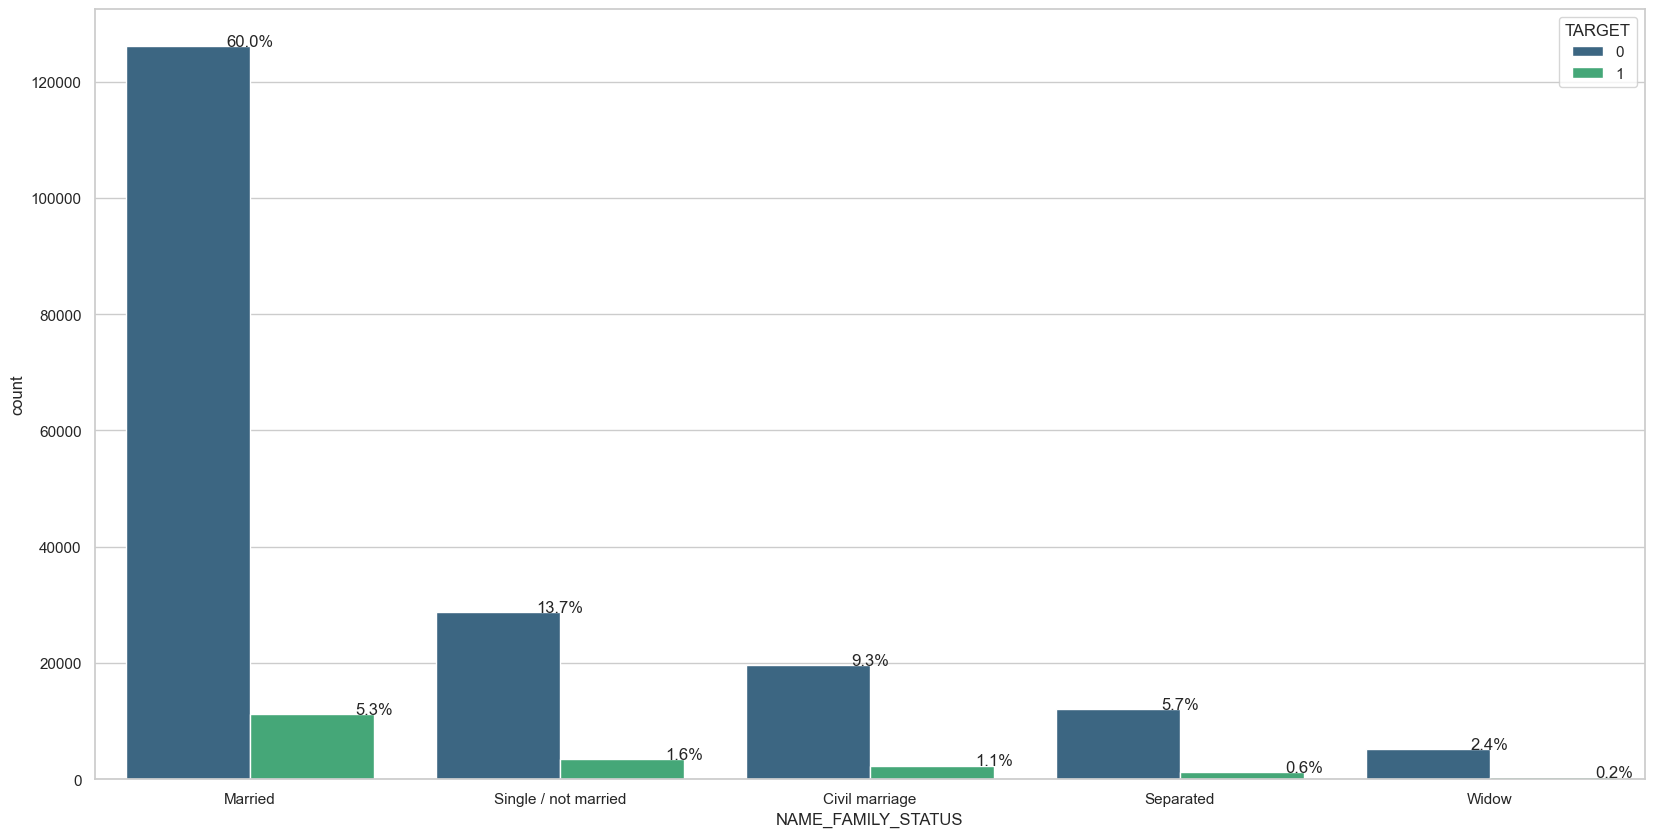

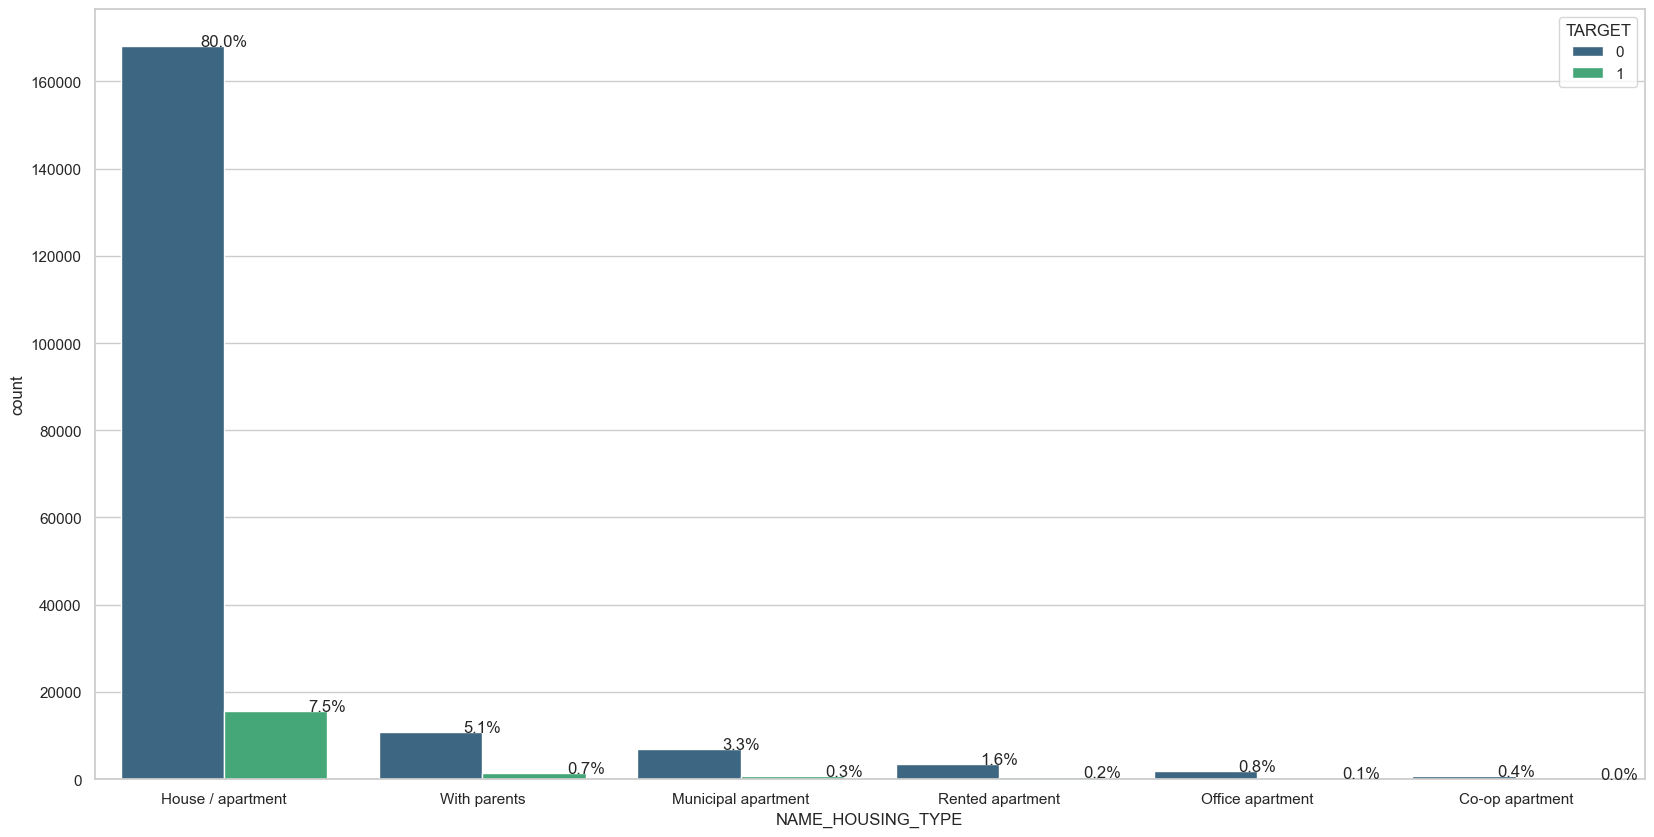

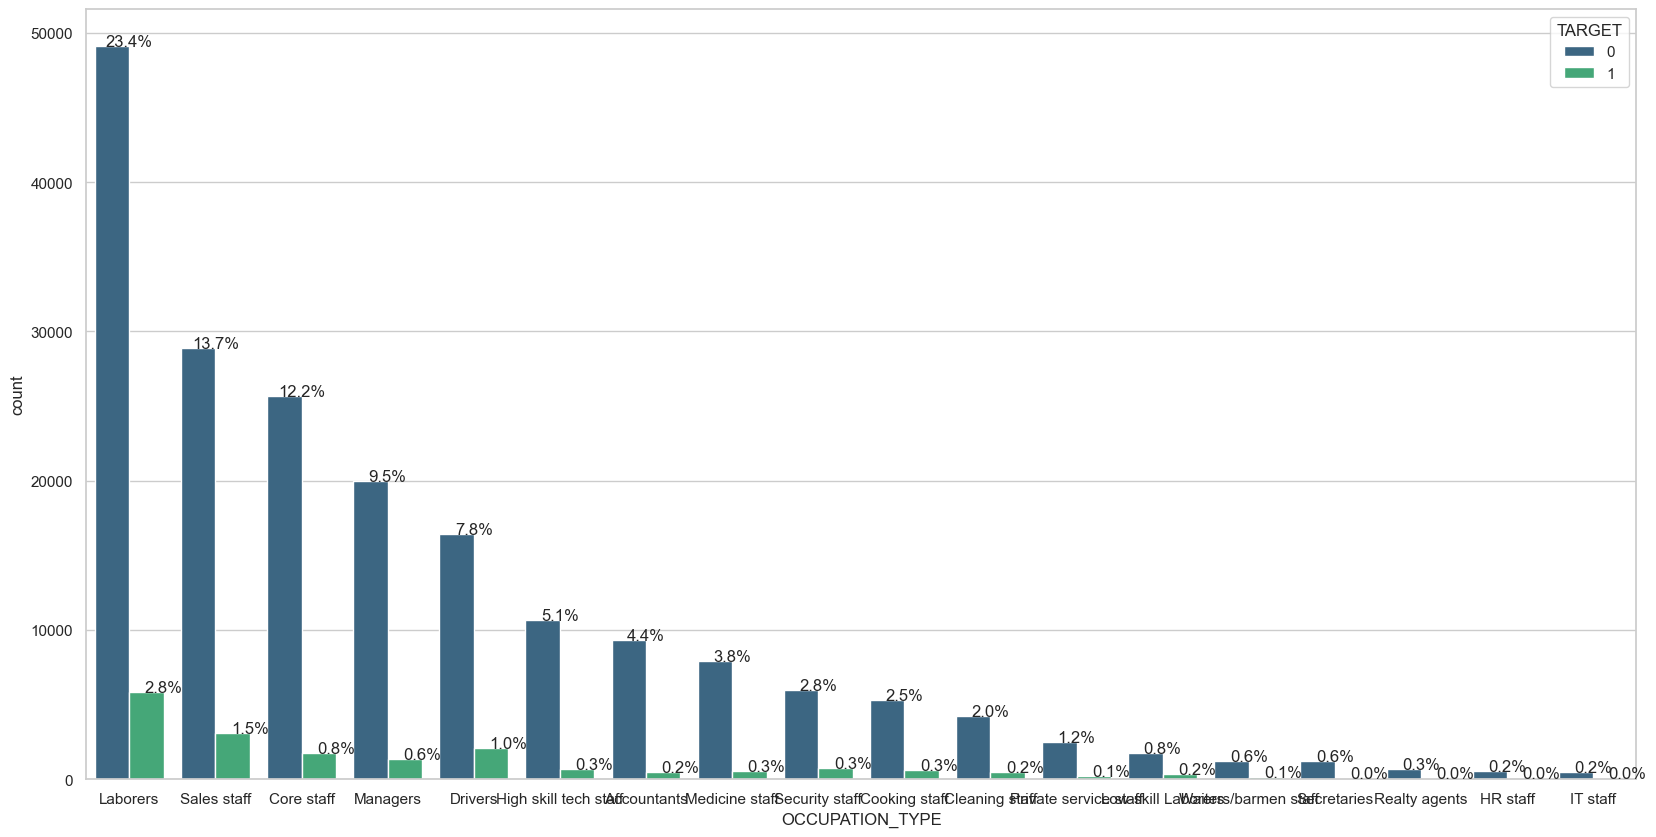

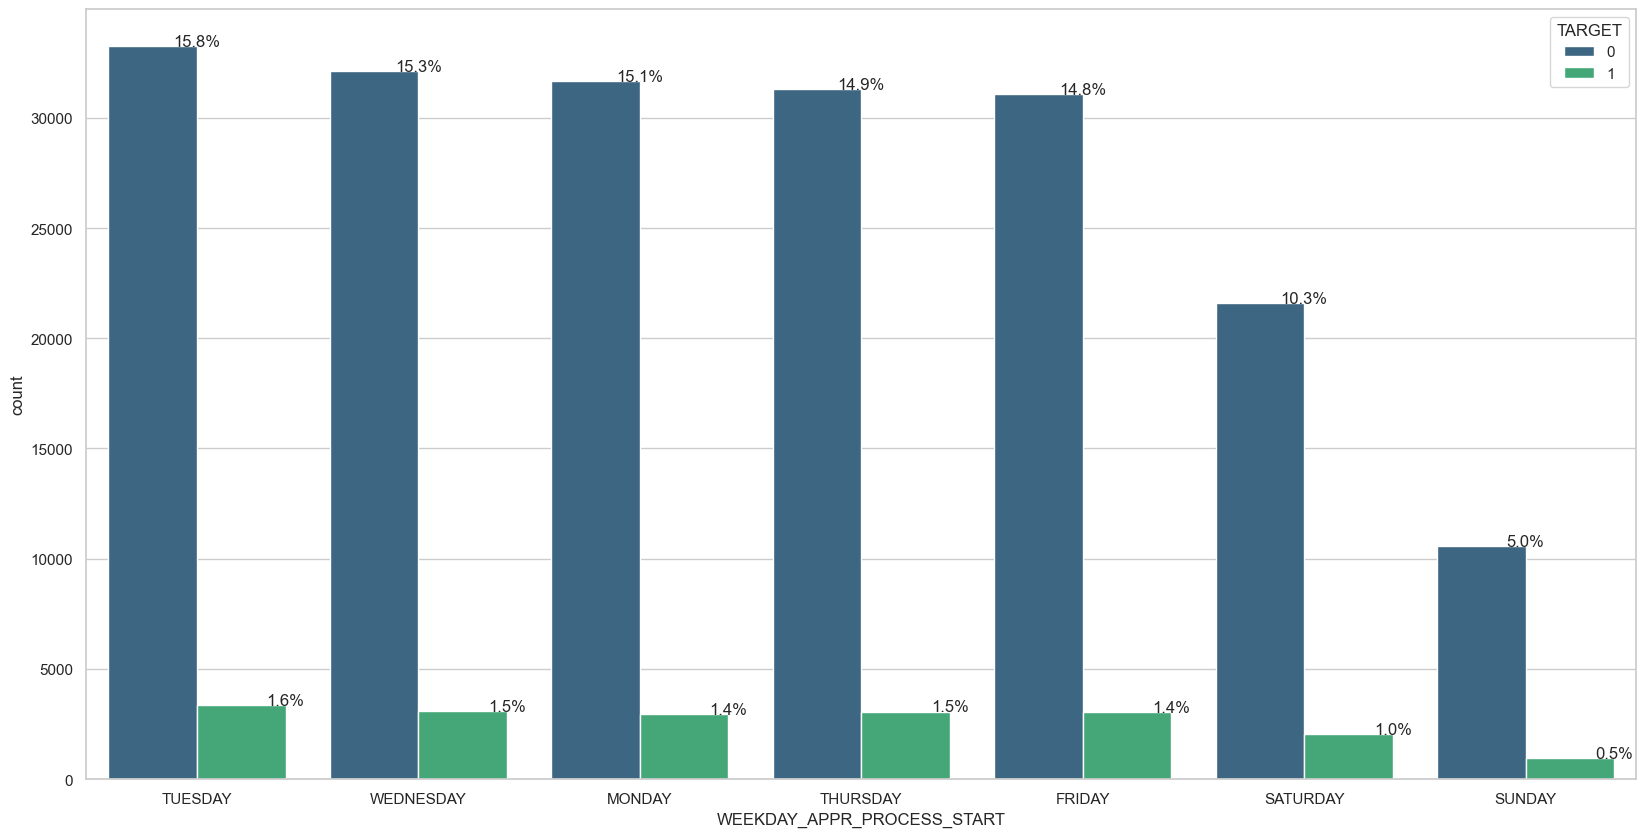

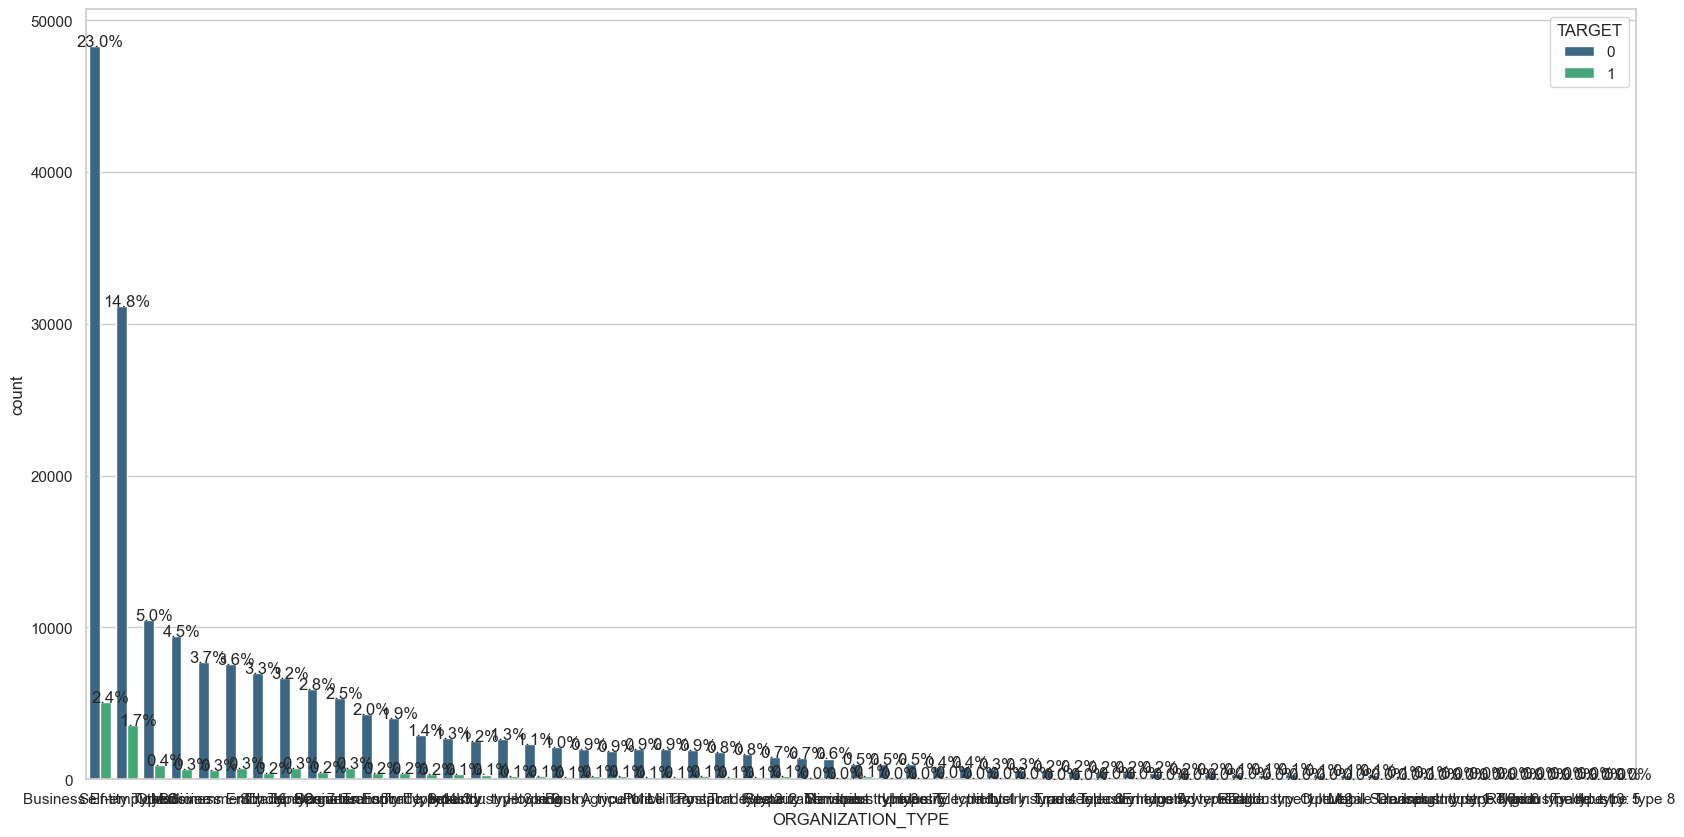

In [19]:
#display the all the categorical variable 
for feature in categorical_feats:
    sns.set(style = 'whitegrid')
    plt.figure(figsize=(20,10))
    total = len(df)
    ax = sns.countplot(x = df[feature], data = df, order=df[feature].value_counts().index, palette='viridis', hue='TARGET')
    #plt.title(feature)
    with_per(total, ax)
    plt.show()

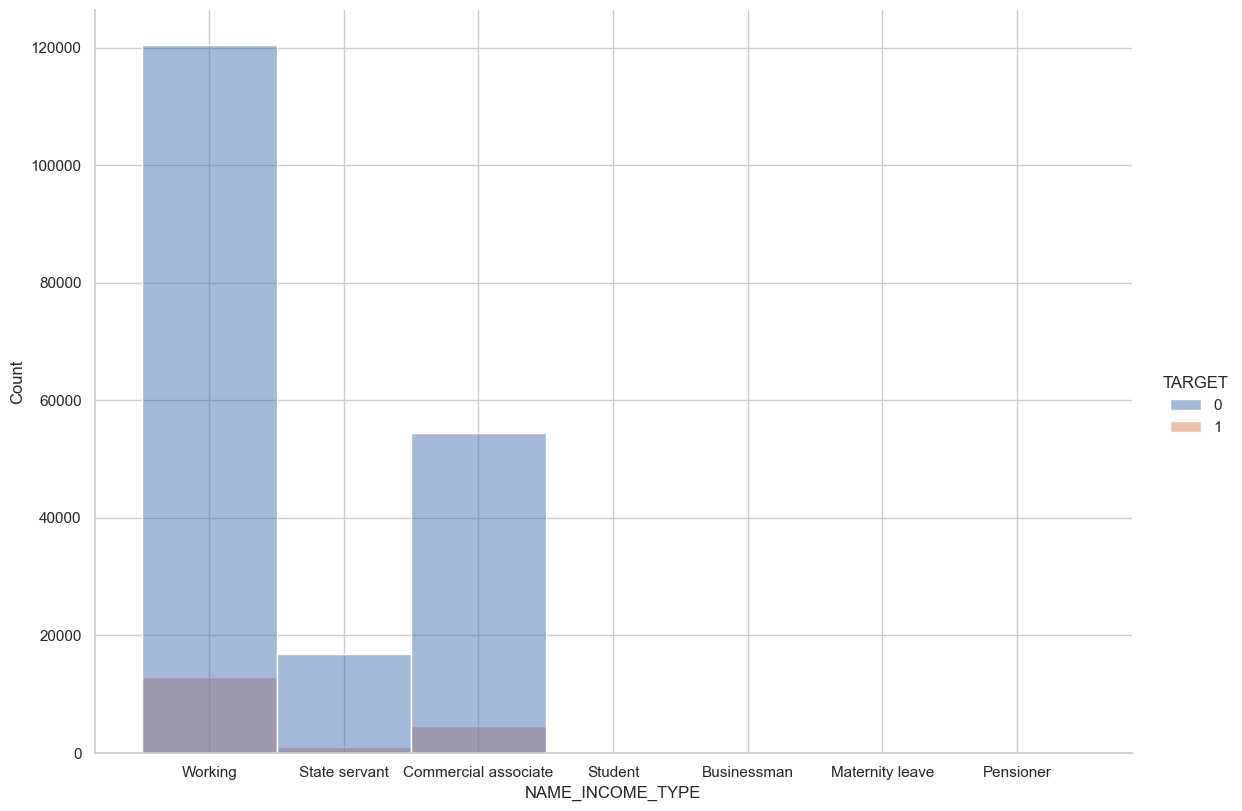

In [20]:
sns.displot(df, x="NAME_INCOME_TYPE", hue="TARGET",height=8.27, aspect=11.7/8.27)

In [21]:
print('Highest Income Total is:',df['AMT_INCOME_TOTAL'].max())
print('Lowest Income Total is: ',df['AMT_INCOME_TOTAL'].min())
print('Average Income Total is: ',df['AMT_INCOME_TOTAL'].mean())

Highest Income Total is: 117000000.0
Lowest Income Total is:  25650.0
Average Income Total is:  175760.62779081217


In [22]:
print('Highest Income Total is:',df['AMT_CREDIT'].max())
print('Lowest Income Total is: ',df['AMT_CREDIT'].min())
print('Average Income Total is: ',df['AMT_CREDIT'].mean())

Highest Income Total is: 4050000.0
Lowest Income Total is:  45000.0
Average Income Total is:  609976.2128269898


In [23]:
df[['TARGET', 'NAME_INCOME_TYPE','FLAG_OWN_CAR','FLAG_OWN_REALTY','AMT_INCOME_TOTAL']].\
  loc[(df['TARGET'] == 1) & (df['NAME_INCOME_TYPE'] == 'State servant') & (df['FLAG_OWN_CAR'] == 'Y')  & (df['FLAG_OWN_REALTY'] == 'Y') & (df['AMT_INCOME_TOTAL'] >= 175760) & (df['AMT_CREDIT'] <= 609976)].\
  groupby(['NAME_INCOME_TYPE']).\
  agg(total = ('NAME_INCOME_TYPE','count')).\
  sort_values(by='total', ascending = True)

,total
NAME_INCOME_TYPE,
State servant,44


In [24]:
df['NAME_INCOME_TYPE'].value_counts()

Working                 133312
Commercial associate     59035
State servant            17839
Student                     13
Businessman                  8
Maternity leave              4
Pensioner                    2
Name: NAME_INCOME_TYPE, dtype: int64

## Encoding

In [25]:
numerical_feats = df.dtypes[df.dtypes != 'object'].index
print('Jumlah Numerical Features: ', len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == 'object'].index
print('Jumlah Categorical Features: ', len(categorical_feats))

Jumlah Numerical Features:  24
Jumlah Categorical Features:  12


In [26]:
print(df[numerical_feats].columns)
print('*'*75)
print(df[categorical_feats].columns)

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'OWN_CAR_AGE', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'average_building'],
      dtype='object')
***************************************************************************
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'],
      dtype='object')


### Label Encoding for Ordinal Data

In [27]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['FLAG_OWN_CAR'] = label_encoder.fit_transform(df['FLAG_OWN_CAR'])

In [28]:
label_encoder = preprocessing.LabelEncoder()
df['FLAG_OWN_REALTY'] = label_encoder.fit_transform(df['FLAG_OWN_REALTY'])

In [29]:
df['NAME_EDUCATION_TYPE'].replace(['Lower secondary','Secondary / secondary special','Incomplete higher','Higher education','Academic degree'],[0,1,2,3,4],inplace=True)
df

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,ORGANIZATION_TYPE,average_building
0,100002,1,Cash loans,M,0,1,0,202500.0,406597.5,24700.5,...,1,0,Laborers,1.0,2,2,WEDNESDAY,10,Business Entity Type 3,0.144336
1,100003,0,Cash loans,F,0,0,0,270000.0,1293502.5,35698.5,...,1,0,Core staff,2.0,1,1,MONDAY,11,School,0.206343
2,100004,0,Revolving loans,M,1,1,0,67500.0,135000.0,6750.0,...,1,0,Laborers,1.0,2,2,MONDAY,9,Government,0.188321
3,100006,0,Cash loans,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,Laborers,2.0,2,2,WEDNESDAY,17,Business Entity Type 3,0.188321
4,100007,0,Cash loans,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,Core staff,1.0,2,2,THURSDAY,11,Religion,0.188321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,Cash loans,F,0,1,0,153000.0,331920.0,16096.5,...,0,0,Sales staff,1.0,2,2,WEDNESDAY,11,Self-employed,0.188321
307506,456251,0,Cash loans,M,0,0,0,157500.0,254700.0,27558.0,...,0,0,Sales staff,1.0,1,1,THURSDAY,15,Services,0.279721
307508,456253,0,Cash loans,F,0,1,0,153000.0,677664.0,29979.0,...,0,1,Managers,1.0,3,3,THURSDAY,9,School,0.255257
307509,456254,1,Cash loans,F,0,1,0,171000.0,370107.0,20205.0,...,0,0,Laborers,2.0,2,2,WEDNESDAY,9,Business Entity Type 1,0.163893


### One Hot Encoding for Nominal Data

In [30]:
nominal_cols = ['NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
# pd.get_dummies(df, columns=nominal_cols)

In [31]:
for col in nominal_cols:
    one_hot = pd.get_dummies(df[col])

    replace_cols = {}
    for one_col in one_hot.columns:
        replace_cols[one_col] = f"{col}_{one_col}"
    one_hot = one_hot.rename(columns=replace_cols)

    df = df.drop(col, axis = 1)
    df = df.join(one_hot)

In [32]:
df

,SK_ID_CURR,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,100002,1,0,1,0,202500.0,406597.5,24700.5,351000.0,1,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,3,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,1,1,0,67500.0,135000.0,6750.0,135000.0,1,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,1,0,135000.0,312682.5,29686.5,297000.0,1,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,1,0,121500.0,513000.0,21865.5,513000.0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,456248,0,0,1,0,153000.0,331920.0,16096.5,225000.0,1,...,0,0,0,0,0,0,0,0,0,0
307506,456251,0,0,0,0,157500.0,254700.0,27558.0,225000.0,1,...,0,0,0,0,0,0,0,0,0,0
307508,456253,0,0,1,0,153000.0,677664.0,29979.0,585000.0,3,...,0,0,0,0,0,0,0,0,0,0
307509,456254,1,0,1,0,171000.0,370107.0,20205.0,319500.0,1,...,0,0,0,0,0,0,0,0,0,0


# Split Data

In [33]:
x = df.drop('TARGET', axis = 1)
y = df['TARGET']

In [34]:
# Splitting Dataset into Training and Test Set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [35]:
df['TARGET'].value_counts()

0    191718
1     18495
Name: TARGET, dtype: int64

# Feature Selection

In [36]:
df.drop('SK_ID_CURR', axis = 1, inplace = True) 

In [37]:
from sklearn.feature_selection import VarianceThreshold
sel_variance_threshold = VarianceThreshold() 
x_train_remove_variance = sel_variance_threshold.fit_transform(x_train)
print(x_train_remove_variance.shape)

(168170, 137)


In [38]:
df

,TARGET,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_EDUCATION_TYPE,REGION_POPULATION_RELATIVE,...,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University
0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,1,0.018801,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,3,0.003541,...,0,0,0,0,0,0,0,0,0,0
2,0,1,1,0,67500.0,135000.0,6750.0,135000.0,1,0.010032,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,135000.0,312682.5,29686.5,297000.0,1,0.008019,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,121500.0,513000.0,21865.5,513000.0,1,0.028663,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307504,0,0,1,0,153000.0,331920.0,16096.5,225000.0,1,0.022625,...,0,0,0,0,0,0,0,0,0,0
307506,0,0,0,0,157500.0,254700.0,27558.0,225000.0,1,0.032561,...,0,0,0,0,0,0,0,0,0,0
307508,0,0,1,0,153000.0,677664.0,29979.0,585000.0,3,0.005002,...,0,0,0,0,0,0,0,0,0,0
307509,1,0,1,0,171000.0,370107.0,20205.0,319500.0,1,0.005313,...,0,0,0,0,0,0,0,0,0,0


# Scaling

In [39]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
mm = MinMaxScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [40]:
print(x_train)

[[ 1.30827538  1.27492785  0.68234715 ... -0.07521358 -0.14744016
  -0.06974154]
 [-1.54417927  1.27492785  0.68234715 ... -0.07521358 -0.14744016
  -0.06974154]
 [ 0.37974485 -0.78435811  0.68234715 ... -0.07521358 -0.14744016
  -0.06974154]
 ...
 [ 1.6142378  -0.78435811 -1.46552969 ... -0.07521358 -0.14744016
  -0.06974154]
 [-0.06869159 -0.78435811 -1.46552969 ... -0.07521358 -0.14744016
  -0.06974154]
 [-0.25901658  1.27492785  0.68234715 ... -0.07521358 -0.14744016
  -0.06974154]]


In [41]:
print(x_test)

[[-0.79679817  1.27492785  0.68234715 ... -0.07521358 -0.14744016
  -0.06974154]
 [ 1.60026061 -0.78435811  0.68234715 ... -0.07521358 -0.14744016
  -0.06974154]
 [ 1.32025999  1.27492785 -1.46552969 ... -0.07521358 -0.14744016
  -0.06974154]
 ...
 [ 0.04593497  1.27492785 -1.46552969 ... -0.07521358 -0.14744016
  -0.06974154]
 [-0.43242898 -0.78435811  0.68234715 ... -0.07521358 -0.14744016
  -0.06974154]
 [ 0.82568328  1.27492785 -1.46552969 ... -0.07521358 -0.14744016
  -0.06974154]]


# SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
# Minority Over Sampling Technique
sm = SMOTE(sampling_strategy = 1, random_state=1)   
x_train_s, y_train_s = sm.fit_resample(x_train, y_train.ravel())
                                         
print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))

Before upsampling count of label 0 153381
Before upsampling count of label 1 14789
After upsampling count of label 0 153381
After upsampling count of label 1 153381


# ML

In [44]:
# Instantiate logreg
logreg = LogisticRegression()

# Fit logreg to the training set
logreg.fit(x_train_s, y_train_s)

# Predict test set labels
y_pred_logreg = logreg.predict(x_test)

print ('hasil akurasi dari data training: ', logreg.score(x_train_s, y_train_s))
print ('hasil akurasi dari data testing: ', logreg.score(x_test, y_test))

hasil akurasi dari data training:  0.6541846773720343
hasil akurasi dari data testing:  0.6201032276478843


In [45]:
def draw_confusion_matrix(cm):
    plt.figure(figsize=(10,8))
    sns.heatmap(cm,annot=True,fmt="d", center=0, cmap='autumn') 
    plt.title("Confusion Matrix")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

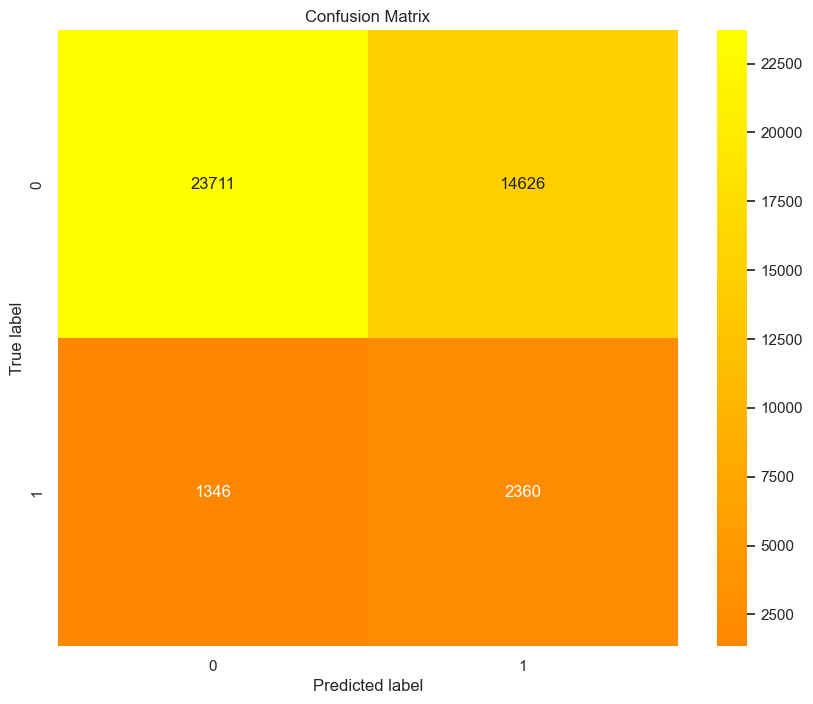

precision score : 0.13893794889909336
recall score : 0.6368051807879115


In [46]:
cm_logreg = confusion_matrix(y_test,y_pred_logreg)
draw_confusion_matrix(cm_logreg)
print('precision score :' , precision_score(y_test,y_pred_logreg))
print('recall score :' , recall_score(y_test,y_pred_logreg))

In [47]:
import xgboost as xgb

xgb = xgb.XGBClassifier()

In [48]:
from sklearn.metrics import accuracy_score

# Fit
xgb.fit(x_train_s, y_train_s)

# Predict
y_pred_xgb = xgb.predict(x_test)

print ('hasil akurasi dari data training: ', xgb.score(x_train_s, y_train_s))
print ('hasil akurasi dari data testing: ', xgb.score(x_test, y_test))

hasil akurasi dari data training:  0.9516009153676139
hasil akurasi dari data testing:  0.911447803439336


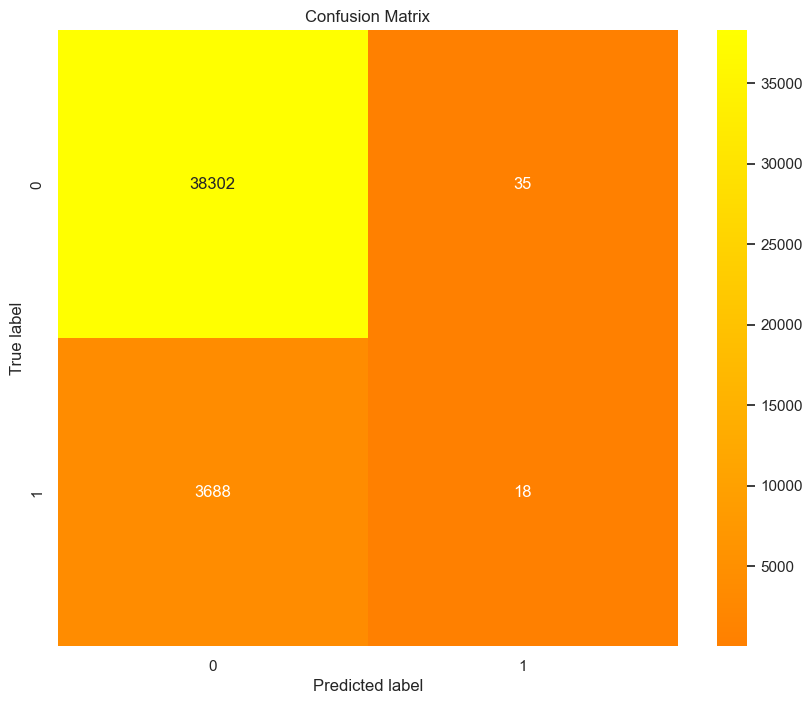

precision score : 0.33962264150943394
recall score : 0.004856988667026443


In [49]:
cm_xgb = confusion_matrix(y_test,y_pred_xgb)
draw_confusion_matrix(cm_xgb)
print('precision score :' , precision_score(y_test,y_pred_xgb))
print('recall score :' , recall_score(y_test,y_pred_xgb))

In [52]:
# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 10
dt = DecisionTreeClassifier()

# Fit dt to the training set
dt.fit(x_train_s, y_train_s)

# Predict test set labels
y_pred_dt = dt.predict(x_test)

print ('hasil akurasi dari data training: ', dt.score(x_train_s, y_train_s))
print ('hasil akurasi dari data testing: ', dt.score(x_test, y_test))

hasil akurasi dari data training:  1.0
hasil akurasi dari data testing:  0.8196132530980187


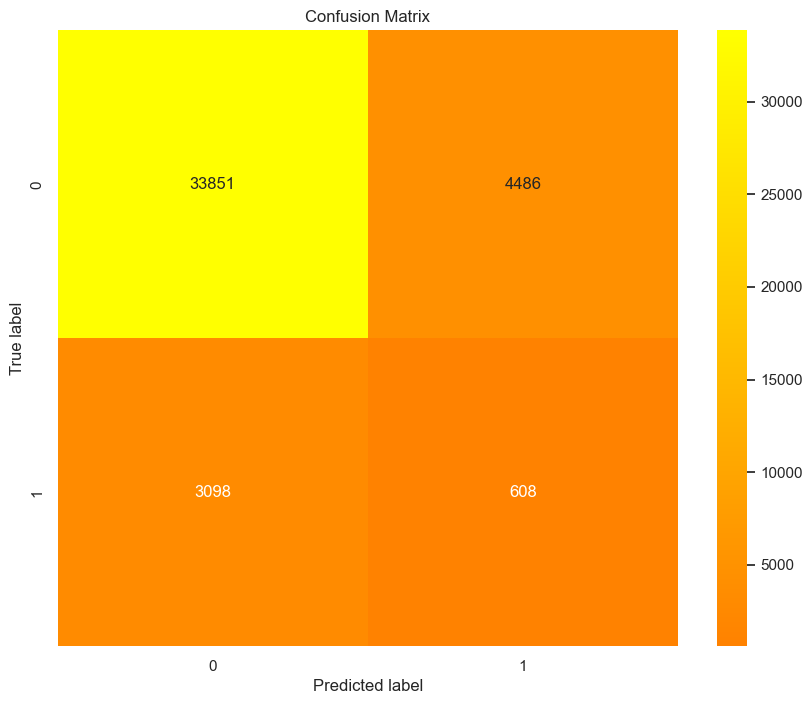

precision score : 0.1193561052218296
recall score : 0.1640582838640043


In [53]:
cm_dt = confusion_matrix(y_test,y_pred_dt)
draw_confusion_matrix(cm_dt)
print('precision score :' , precision_score(y_test,y_pred_dt))
print('recall score :' , recall_score(y_test,y_pred_dt))